# Turing Machine and Deep Learning

## Assignment Neural Networks

This notebook is meant for you to review and reflect on the content of Lecture 4, which was mainly about neural networks. In particular, we'll focus on aspects that were only briefly mentioned in class in order for you to get a better understanding of it.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 4" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


In [4]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer
import tensorflow as tf            # NNs and associated
from tensorflow import keras       # NNs and associated
from tensorflow.keras import layers, models

# CNNs

In the lecture, we saw some code that implemented MLPs and CNNs for the task of image classification on CIFAR10. However, we skipped over some details of what CNNs actually do.

A CNN works by automatically learning and extracting meaningful patterns, features, and hierarchies from the input data in the following way:

1. **Convolution**: A CNN applies (multiple) small filters (kernels) to an input image, performing element-wise multiplications and sums to extract features like edges, corners, and textures. We also did this computation in person during class. These kernels may be a matrix (what we saw in the lecture), or even a stack of matrices (e.g. for RGB images). I'd recommend watching this [3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA&pp=ygUTY29udm9sdXRpb25zIGluIGNubg%3D%3D) and this [DeepLearning.AI](https://www.youtube.com/watch?v=KTB_OFoAQcc) video for reference.
2. **Non-linearity**: Non-linear activation functions (e.g., ReLU) are applied to introduce complexity and allows the capture of more abstract representations.
3. **Pooling**: Pooling operations are used to downsample the spatial dimensions of feature maps while preserving the most important information. In both cases, a pooling window or filter moves across the input feature map, and a single value is selected or computed within the window based on the pooling operation. Pooling helps reduce the computational complexity of the network and introduces some translation invariance. There are a few types of pooling, but most commonly used are max-pooling and average-pooling.
4. **Hierarchy**: Convolution and pooling operations are repeated to create a hierarchy of feature extraction layers, learning more complex and high-level features.
5. **Fully Connected Layers**: Flattened features are passed through fully connected layers, similar to a traditional MLP, for classification or regression.
6. **Training**: Parameters are adjusted using backpropagation and optimization algorithms to minimize the difference between predictions and true labels.

By leveraging convolution, non-linearity, and hierarchical feature extraction, CNNs can automatically learn and recognize intricate patterns and structures in visual data, making them well-suited for tasks like image classification and object detection.

You can think of the convolution operation with a kernel over an image as outputting a new modified image, called a feature map. When applying convolutions over feature maps, the size of the output feature map (in each dimension) can be computed by:

$$o = \frac{i - k + 2 p}{s + 1}$$

where the hyperparameters of the convolution are:
- $i$: input_size is the size (height or width) of the input feature map.
- $k$: kernel_size is the size (height or width) of the convolutional kernel/filter.
- $p$: padding is the number of pixels added to each side of the input feature map (if applicable) (default 0)
- $s$: stride is the step size or the number of pixels the kernel moves at each step (default 1)

The output size of a pooling operation can also be defined as:
$$o = \frac{i - p}{s+1 }$$

**Q1.1** Thus, starting with a 28x28 pixel image (e.g. MNIST), write a series of kernel sizes to use in convolutions (optionally including a pooling operation if you want to try it out, and optionally padding and stride) in order to get it down to an image size of 6x6. There are several correct answers possible here.

One valid solution is:

Convolution 1: Use a 3×3 filter with stride 1 and padding 1.
  - Input: 28×28 → Output: 28×28

Pooling 1: Apply a 2×2 max pooling with stride 2.
  - Output: 28×28 → 14×14

Convolution 2: Use another 3×3 filter with stride 1 and padding 1.
  - Output remains 14×14

Pooling 2: Apply a second 2×2 max pooling with stride 2.
  - Output: 14×14 → 7×7

Convolution 3: Use a 2×2 filter with stride 1 and no padding.
  - Output: (7–2)/1 + 1 = 6×6

This sequence of operations reduces the 28×28 image down to 6×6.

**Q1.2** Now, let's try out your strategy in code. Implement the convolutions you defined above to perform classification over MNIST digits. Note that most of the code is written for you, but be mindful of the steps that are written. Note that you need to choose the number of kernals as well as the size at each layer. The input shape of your next layer is the output shape you computed above and the number of kernels you chose for the previous layer ``input_shape=(w,h,k)``.

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
# TODO: Complete this cell

# A Conv2D layer performs 2D convolution -- the same as we saw in class.
# The main inputs to this class are the number of kernels, the size of each kernel,
# the non-linear activation function and the input shape. Optionally, you can define a padding
# and/or a stride. Use it like this:
# keras.layers.Conv2D(<n_kernels>,
#                     kernel_size=<tuple>,
#                     activation=<string>,
#                     input_shape=<tuple>,
#                     padding=<string>,
#                     stride=<int/tuple>)
# You can read the documentation here: https://keras.io/api/layers/convolution_layers/convolution2d/

# Build the model
model = models.Sequential([
    # First convolution: 32 kernels of size 3x3, 'relu' activation, same padding to preserve 28x28
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    # First pooling layer: reduces size to 14x14
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolution: 64 kernels of size 3x3, 'relu' activation, same padding; output remains 14x14
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Second pooling layer: reduces size to 7x7
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third convolution: 128 kernels of size 2x2, 'relu' activation, valid padding; output becomes 6x6
    layers.Conv2D(128, kernel_size=(2, 2), activation='relu', padding='valid'),
    
    # Flatten the feature maps to feed into dense layers
    layers.Flatten(),
    
    # Dense layer for further processing
    layers.Dense(128, activation='relu'),
    
    # Final dense layer for classification into 10 categories; softmax outputs a probability distribution
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8534 - loss: 0.4795 - val_accuracy: 0.9825 - val_loss: 0.0624
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9846 - loss: 0.0495 - val_accuracy: 0.9832 - val_loss: 0.0532
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9906 - loss: 0.0317 - val_accuracy: 0.9893 - val_loss: 0.0341
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9881 - val_loss: 0.0392
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9887 - val_loss: 0.0409
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9888 - val_loss: 0.0381
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9911 - val_loss: 0.0314
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9972 - loss: 0.0083 - 

**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

Both training and validation curves improve in tandem, with the validation loss only slightly higher than the training loss. This indicates minimal overfitting, and the model reaches very high accuracy (~99%). Further training likely won’t improve validation accuracy much, so stopping early is reasonable.

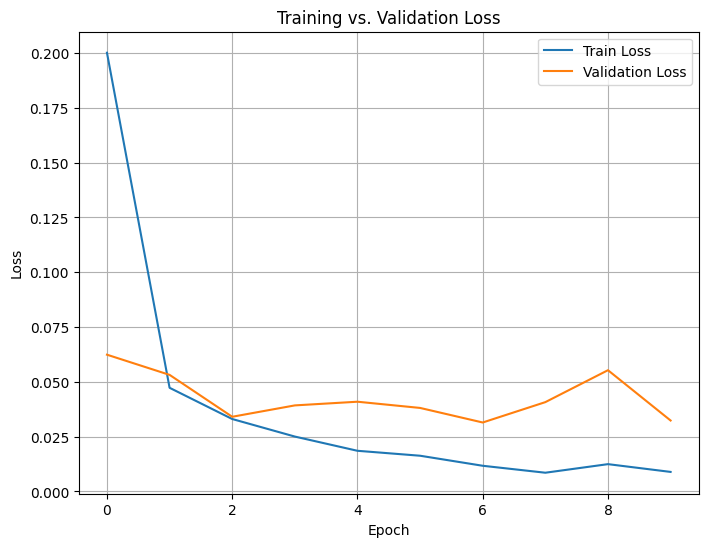

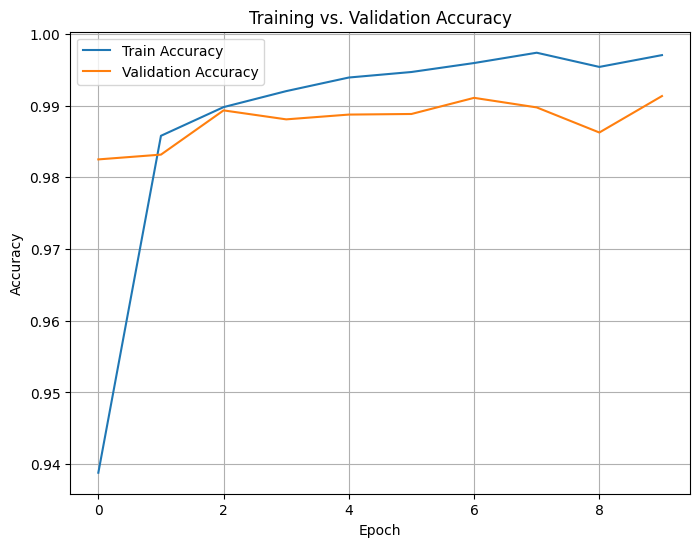

In [7]:
# Plot losses
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

# RNNs

An RNN (Recurrent Neural Network) is a type of artificial neural network that is particularly effective in processing sequential data. Unlike feedforward neural networks, which process inputs independently, RNNs have connections that allow information to flow in cycles. This cyclic connectivity enables them to capture temporal dependencies and learn patterns over time. You can find more in these [neural network lecture notes (Jaeger 2023, chapter 4)](https://www.ai.rug.nl/minds/uploads/LN_NN_RUG.pdf). Here is an overview of how RNNs work:

- **Recurrent Connections**: RNNs have recurrent connections that allow information to be passed from one step to the next in a sequence. At each time step, the RNN takes an input and combines it with the information from the previous step. This feedback loop enables the network to have memory and make predictions based on the context of past inputs.

- **Hidden State**: RNNs maintain a hidden state vector that serves as a memory of the network. The hidden state is updated at each time step and contains information about the previous inputs in the sequence. It captures the network's understanding of the sequence up to that point and is used to influence the processing of future inputs.

- **Sequence Processing**: RNNs process sequences by iterating through each element one at a time. As the network receives an input at each time step, it updates its hidden state based on the input and the previous hidden state. The updated hidden state is then used to make predictions or generate outputs.

- **Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU)**: LSTMs and GRUs are popular types of RNN architectures that address the vanishing gradient problem and capture long-term dependencies more effectively. These architectures introduce specialized memory cells and gating mechanisms that allow the network to selectively update and forget information.

- **Training**: RNNs are typically trained using the backpropagation through time (BPTT) algorithm, which extends backpropagation to handle sequences. The goal is to minimize the difference between the predicted outputs and the true targets by adjusting the network's parameters through gradient descent optimization.

- **Applications**: RNNs are well-suited for tasks involving sequential data, such as natural language processing, speech recognition, machine translation, time series analysis, and sentiment analysis. They can effectively model dependencies and capture context in these domains.

By leveraging recurrent connections and hidden state information, RNNs excel at processing and understanding sequential data. They are powerful tools for tasks that require temporal modeling and have made significant contributions to the field of deep learning.

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load the Air Passengers dataset
data = pd.read_csv('/Users/Hermie/Desktop/Turing Machine & Deep Learning/AirPassengers.csv')
time_series = data['#Passengers'].values.astype(float)

time_series = np.array(time_series).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
time_series = scaler.fit_transform(time_series)

# predict the (n+1)th point given n points
sequence_length = 6

# Split the data into training and testing sets
train_data = time_series[:120]  # First 120 months for training
test_data = time_series[120:]   # Last 24 months for testing

# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create input sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


# Reshape the input data to be 3D (batch_size, sequence_length, num_features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [10]:
# Build the LSTM model
# Build the LSTM model
model = keras.Sequential([
    # LSTM layer with 50 units, processing sequences of length 'sequence_length' with 1 feature each
    keras.layers.LSTM(50, input_shape=(sequence_length, 1)),
    # Final dense layer outputs a single value (regression task)
    keras.layers.Dense(1)
])

# Compile the model with mean squared error loss and the Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model: adjust epochs and batch size as needed
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_split=0.2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0446 - val_loss: 0.1140
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - val_loss: 0.0447
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0088 - val_loss: 0.0202
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - val_loss: 0.0187
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - val_loss: 0.0242
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - val_loss: 0.0297
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0291
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - val_loss: 0.0252
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0058 - val_loss: 0.0214
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - val_loss: 0.0206
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - val_loss: 0.0215
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - val_loss: 0.0220
Epoch 13/

**Q1.3** Plot the train and validation losses and and accuracies. Do not forget to add labels. What can you say about the model over/underfitting? Would you continue training it, or stop earlier? Why?

Train Score: 1790.08 (MSE)
Test Score: 7443.12 (MSE)

The model’s train loss is significantly lower than its test loss, indicating overfitting. Further training probably won’t help and may worsen overfitting. Instead, we might stop earlier (or use early stopping) and consider techniques like regularization or a smaller model to improve generalization.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


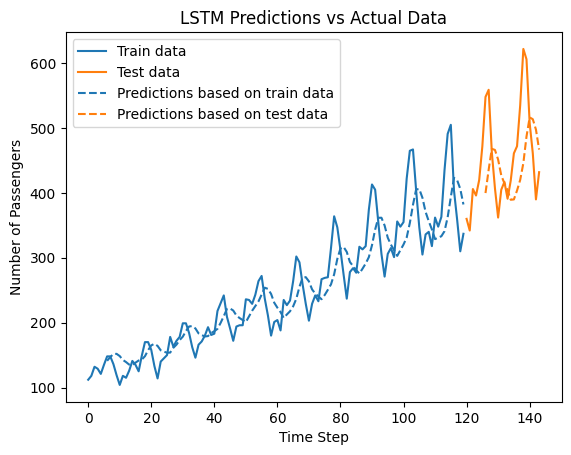

Train Score: 1790.08 (MSE)
Test Score: 7443.12 (MSE)


In [11]:
# Predict on the test set
# make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# invert predictions
train_preds = scaler.inverse_transform(train_preds)
y_train_inv = scaler.inverse_transform(y_train)
test_preds = scaler.inverse_transform(test_preds)
y_test_inv = scaler.inverse_transform(y_test)

# plotting code adapted from https://www.kaggle.com/code/singhalamogh/lstm-regression-on-time-series-data
# 'data' is the complete time series in original scale
data = scaler.inverse_transform(time_series)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[sequence_length:len(train_preds) + sequence_length, :] = train_preds

# shift test true data for plotting
testTruePlot = np.empty_like(data)
testTruePlot[:, :] = np.nan
testTruePlot[len(train_preds)+sequence_length:len(data), :] = scaler.inverse_transform(test_data)

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+2*sequence_length:len(data), :] = test_preds

# plot baseline and predictions
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(scaler.inverse_transform(train_data), color=colors[0], label="Train data")
plt.plot(testTruePlot[:,0], color=colors[1], label="Test data")
plt.plot(trainPredictPlot[:,0], color=colors[0], linestyle="--", label="Predictions based on train data")
plt.plot(testPredictPlot[:,0], color=colors[1], linestyle="--", label="Predictions based on test data")
plt.xlabel("Time Step")
plt.ylabel("Number of Passengers")
plt.title("LSTM Predictions vs Actual Data")
plt.legend()
plt.show()

# calculate root mean squared error
train_score = mean_squared_error(y_train_inv, train_preds)
print('Train Score: %.2f (MSE)' % (train_score))
test_score = mean_squared_error(y_test_inv, test_preds)
print('Test Score: %.2f (MSE)' % (test_score))
